In [9]:
import sys
sys.path.append('../')
from model import NeuralNetwork, train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
data = np.array(pd.read_csv("Datasets/digit-recognizer/train.csv"))
samples, labels = data[:, 1:data.shape[0]], data[:, 0:1]

indices = np.arange(len(samples))
np.random.shuffle(indices)
samples, labels = samples[indices] / 255., labels[indices]

In [4]:
x_train, y_train, x_test, y_test = train_test_split(samples, labels, 0.1)

In [14]:
model = NeuralNetwork(
    [
        (784, 'relu'), 
        (128, 'relu'), 
        (128, 'relu'), 
        (64, 'relu'), 
        (10, 'softmax'), 
    ]
)

history = model.fit(
    x_train, y_train,
    epochs=8, 
    learning_rate=0.1,
    lossFunction="cross_entropy", 
    batch_size=32, 
    validation_data=(x_test, y_test)
)


Epoch 1/8
1181/1181 accuracy: 0.727011 - loss: 1.512590 - val_acc: 0.825714 - val_loss: 0.667077

Epoch 2/8
1181/1181 accuracy: 0.841190 - loss: 0.580037 - val_acc: 0.860952 - val_loss: 0.498068

Epoch 3/8
1181/1181 accuracy: 0.870688 - loss: 0.452938 - val_acc: 0.870714 - val_loss: 0.442787

Epoch 4/8
1181/1181 accuracy: 0.886138 - loss: 0.390205 - val_acc: 0.887143 - val_loss: 0.395614

Epoch 5/8
1181/1181 accuracy: 0.897037 - loss: 0.347849 - val_acc: 0.897619 - val_loss: 0.358571

Epoch 6/8
1181/1181 accuracy: 0.905238 - loss: 0.317758 - val_acc: 0.896667 - val_loss: 0.346764

Epoch 7/8
1181/1181 accuracy: 0.912566 - loss: 0.293459 - val_acc: 0.900238 - val_loss: 0.345926

Epoch 8/8
1181/1181 accuracy: 0.918016 - loss: 0.273426 - val_acc: 0.910000 - val_loss: 0.321239


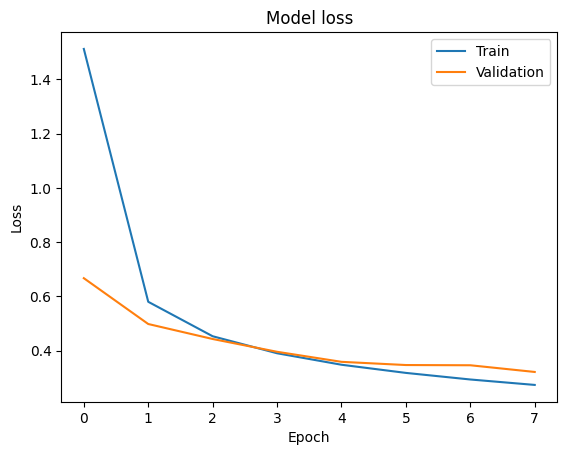

In [15]:
plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

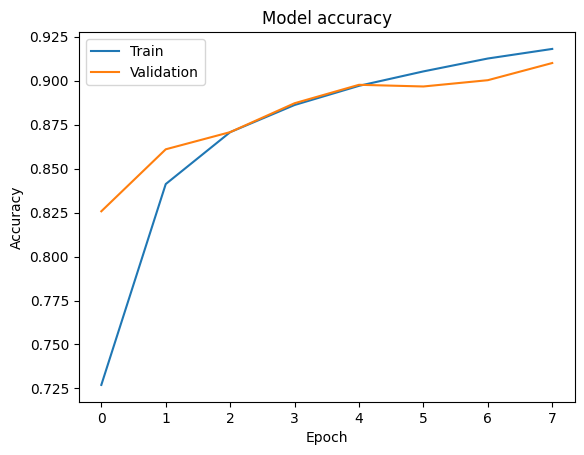

In [16]:
plt.plot(history['train_accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()